In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df = df.iloc[:, 2:]

In [5]:
df.sample(5)

,Age,EstimatedSalary,Purchased
38,26,72000,0
121,37,72000,0
201,49,74000,0
32,21,16000,0
55,24,55000,0


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis = 1), df['Purchased'], test_size = 0.3, random_state = 0)

In [7]:
X_train.shape

(280, 2)

## Standard Scaler

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()

In [11]:
scaler.fit(X_train)

StandardScaler()

In [12]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## SCALER RETURNS NUMPY ARRAY INSTEAD OF DATAFRAME.

In [13]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [14]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_train.columns)

In [15]:
np.round(X_train.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [16]:
np.round(X_train_scaled.describe(), 1)   # MEAN --- 0 SD --- 1

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


## Visualization of Scaling

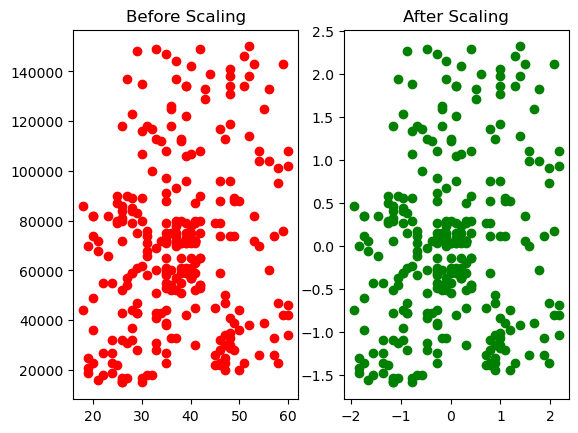

In [18]:
fig, (ax1, ax2) = plt.subplots(ncols = 2)

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'], c = 'r')
ax1.set_title('Before Scaling')

ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'], c = 'g')
ax2.set_title('After Scaling')

plt.show()

In [19]:
## PATTERN IS SAME JUST MEAN WENT TO 0 AND SD is DECREASED.

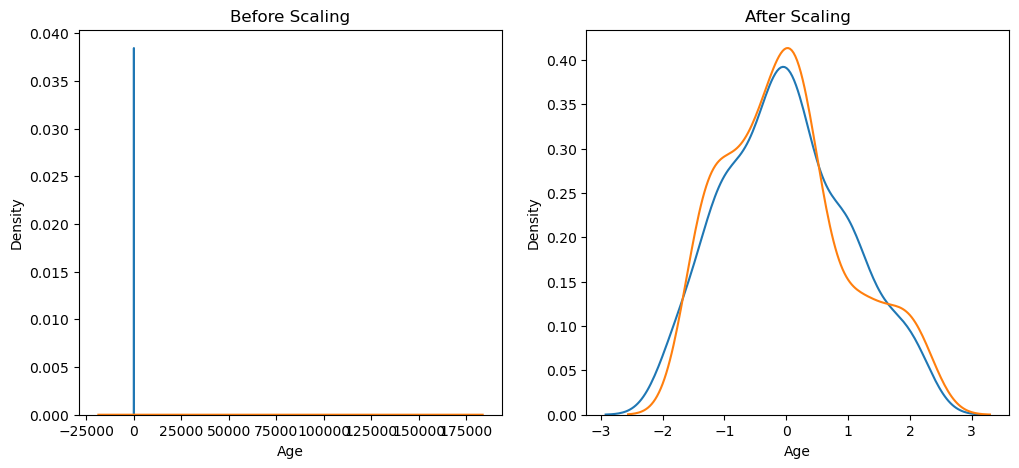

In [20]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize=(12,5))

sns.kdeplot(X_train['Age'], ax = ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax = ax1)
ax1.set_title('Before Scaling')


sns.kdeplot(X_train_scaled['Age'], ax = ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax = ax2)
ax2.set_title('After Scaling')

plt.show()

In [21]:
# VERY BAD PDF OF AGE GRAPH BEFORE SCALING
# AFTER SCALING IT IS DISTRIBUTED BETTER.

## Why it is important?

In [49]:
from sklearn.linear_model import LogisticRegression

In [51]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [53]:
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

LogisticRegression()

In [55]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [57]:
from sklearn.metrics import accuracy_score

In [59]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.875
Scaled 0.8666666666666667
